### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
import matplotlib.pyplot as plt

# Concatenar todos los datos
df = pd.concat([tienda, tienda2, tienda3, tienda4])
df.reset_index(drop=True, inplace=True)


#1. Análisis de facturación



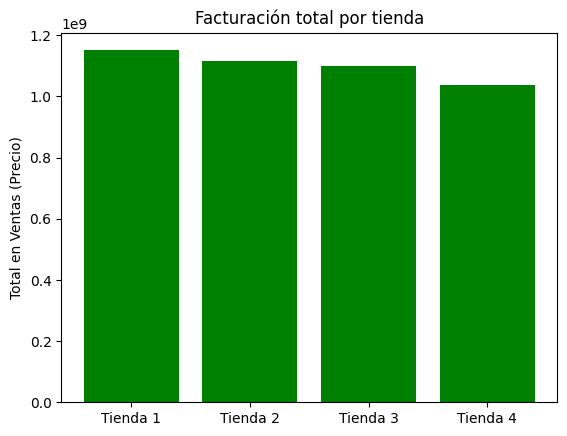

In [ ]:
facturacion = [
    tienda['Precio'].sum(),
    tienda2['Precio'].sum(),
    tienda3['Precio'].sum(),
    tienda4['Precio'].sum()
]

plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], facturacion, color='green')
plt.title('Facturación total por tienda')
plt.ylabel('Total en Ventas (Precio)')
plt.show()


# 2. Ventas por categoría

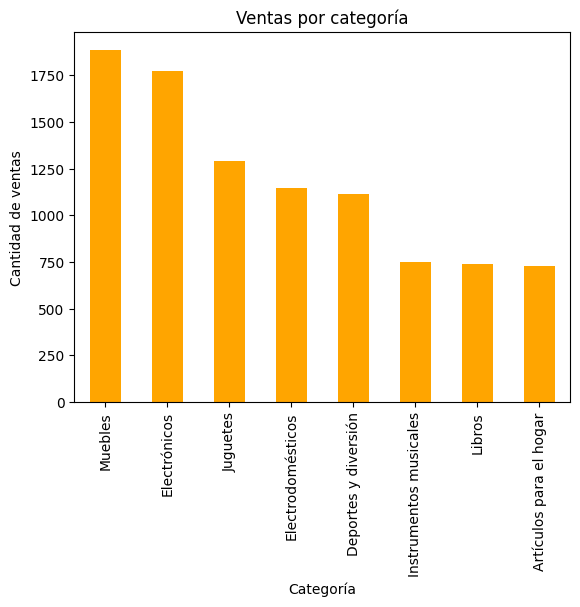

In [ ]:
ventas_categoria = df['Categoría del Producto'].value_counts()

ventas_categoria.plot(kind='bar', color='orange')
plt.title('Ventas por categoría')
plt.ylabel('Cantidad de ventas')
plt.xlabel('Categoría')
plt.show()


# 3. Calificación promedio de la tienda


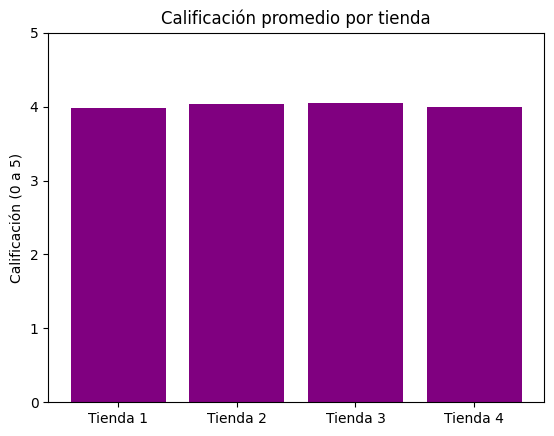

In [ ]:
calificacion_prom = [
    tienda['Calificación'].mean(),
    tienda2['Calificación'].mean(),
    tienda3['Calificación'].mean(),
    tienda4['Calificación'].mean()
]

plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], calificacion_prom, color='purple')
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación (0 a 5)')
plt.ylim(0, 5)
plt.show()


# 4. Productos más y menos vendidos

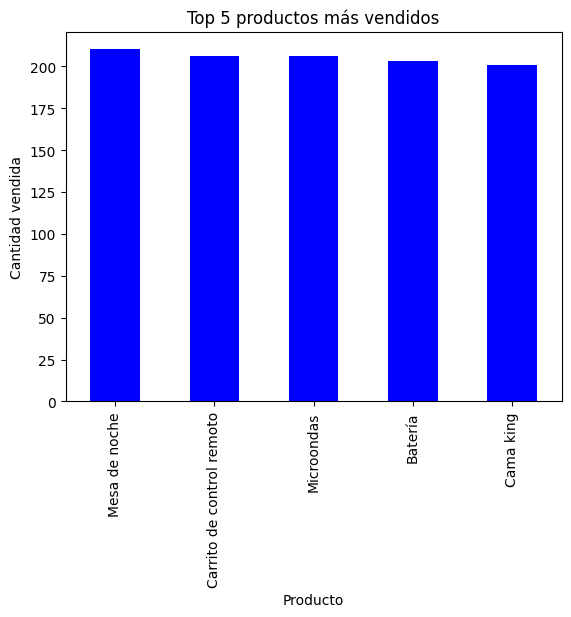

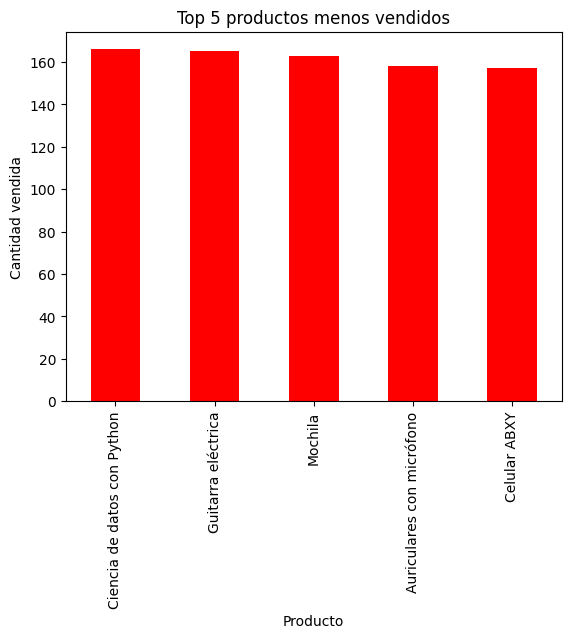

In [ ]:
productos_vendidos = df['Producto'].value_counts()

# Más vendidos
productos_vendidos.head(5).plot(kind='bar', color='blue')
plt.title('Top 5 productos más vendidos')
plt.ylabel('Cantidad vendida')
plt.show()

# Menos vendidos
productos_vendidos.tail(5).plot(kind='bar', color='red')
plt.title('Top 5 productos menos vendidos')
plt.ylabel('Cantidad vendida')
plt.show()


In [ ]:
# Agregar columna con el nombre de la tienda a cada DataFrame
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unir todos los DataFrames en uno solo
df_completo = pd.concat([tienda, tienda2, tienda3, tienda4])

# Agrupar por producto y tienda para contar cuántas veces se vendió cada producto
productos_vendidos = df_completo.groupby(['Producto', 'Tienda']).size().reset_index(name='Cantidad')

# Mostrar los 10 productos más vendidos
print("Productos más vendidos:")
print(productos_vendidos.sort_values('Cantidad', ascending=False).head(10))

# Mostrar los 10 productos menos vendidos
print("\nProductos menos vendidos:")
print(productos_vendidos.sort_values('Cantidad').head(10))


Productos más vendidos:
                      Producto    Tienda  Cantidad
97   Iniciando en programación  Tienda 2        65
43                    Cama box  Tienda 4        62
133                 Microondas  Tienda 2        62
29                     Batería  Tienda 2        61
192              TV LED UHD 4K  Tienda 1        60
132                 Microondas  Tienda 1        60
4                      Armario  Tienda 1        60
63                  Cubertería  Tienda 4        59
160           Secadora de ropa  Tienda 1        58
85           Guitarra acústica  Tienda 2        58

Productos menos vendidos:
                      Producto    Tienda  Cantidad
105              Juego de mesa  Tienda 2        32
16   Auriculares con micrófono  Tienda 1        33
91          Guitarra eléctrica  Tienda 4        33
52                Celular ABXY  Tienda 1        33
93                   Impresora  Tienda 2        34
125            Mesa de comedor  Tienda 2        34
7                      Armario 

# 5. Envío promedio por tienda

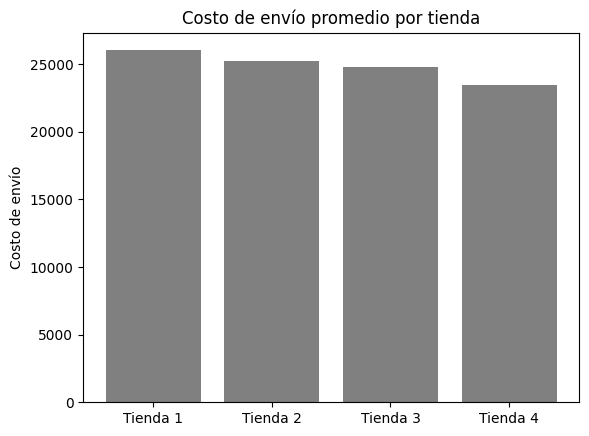

In [ ]:
costo_envio_prom = [
    tienda['Costo de envío'].mean(),
    tienda2['Costo de envío'].mean(),
    tienda3['Costo de envío'].mean(),
    tienda4['Costo de envío'].mean()
]

plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], costo_envio_prom, color='gray')
plt.title('Costo de envío promedio por tienda')
plt.ylabel('Costo de envío')
plt.show()


# 6: Costo de envío promedio por tienda

In [ ]:
print("""
RECOMENDACIÓN FINAL:

Con base en los análisis realizados:

- Facturación total
- Calificación promedio
- Costo de envío promedio
- Popularidad de productos

Se recomienda vender la **TIENDA 4**, por ser la de peor desempeño general.

Tienda 4

❌ Peor facturación (4° lugar)
❌ Calificación media-baja (3° lugar)
✅ Costo de envío más bajo (4° lugar)
✅ Tiene algunos productos populares (como la cama box)
❌ También aparece entre los menos vendidos

Tiene mal desempeño financiero, calificaciones no destacadas, y aunque sus costos
de envío son bajos, no tiene mucho potencial ni buena percepción del cliente.
La mezcla de baja facturación + calificación mediocre la hace la menos prometedora.

Esto permitirá a la empresa centrarse en las tiendas más rentables y con mejor percepción por parte de los clientes,
optimizando así su rendimiento de cara al nuevo emprendimiento del Sr. João.""")




RECOMENDACIÓN FINAL:

Con base en los análisis realizados:

- Facturación total
- Calificación promedio
- Costo de envío promedio
- Popularidad de productos

Tienda 4
❌ Peor facturación (4° lugar)

❌ Calificación media-baja (3° lugar)

✅ Costo de envío más bajo (4° lugar)

✅ Tiene algunos productos populares (como la cama box)

❌ También aparece entre los menos vendidos

Se recomienda vender la **TIENDA 4**, por ser la de peor desempeño general.

Esto permitirá a la empresa centrarse en las tiendas más rentables y con mejor percepción por parte de los clientes,
optimizando así su rendimiento de cara al nuevo emprendimiento del Sr. João.
